# <div class="alert alert-success">Tree Traversal 树的遍历/周游</div>

144. Binary tree preorder traversal
145. Binary tree postorder traversal
94. Binary tree inorder traversal
102. Binary Tree Level Order Traversal

589. N-ary Tree Preorder Traversal

Morris Traversal...

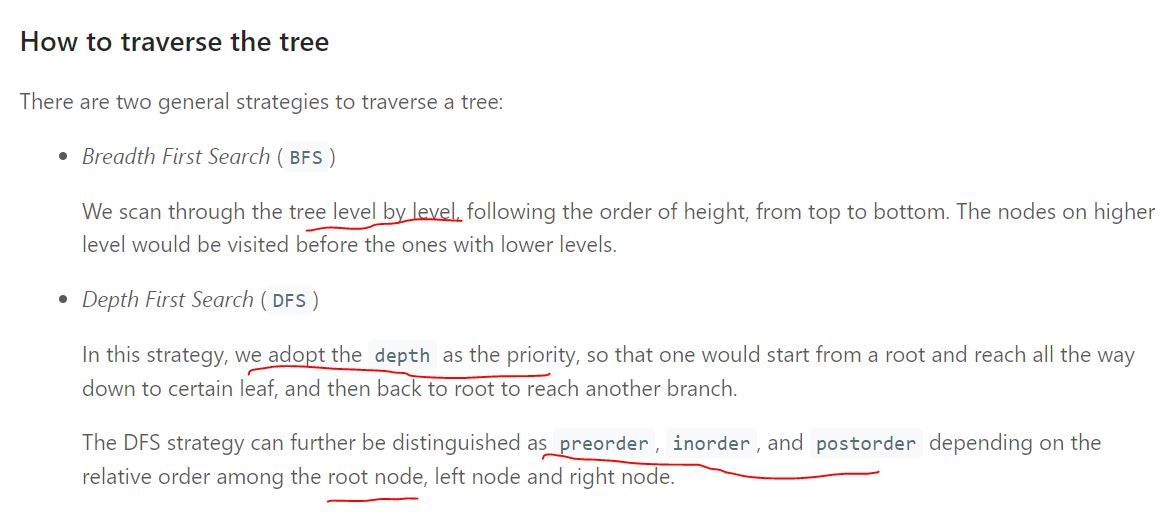

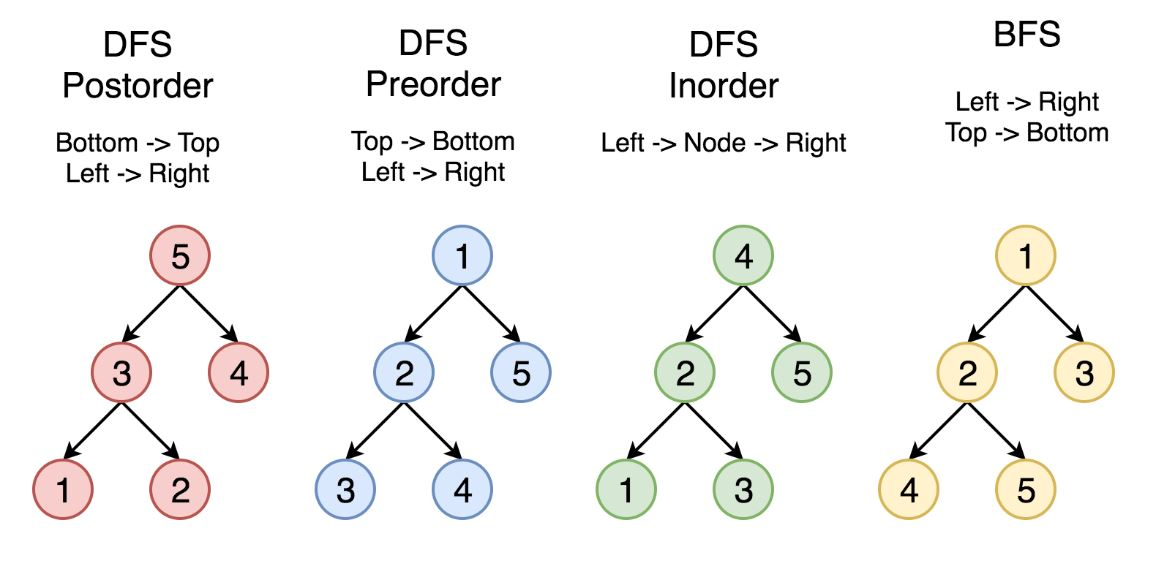

# 144. binary tree preorder traversal

### <div class="alert alert-info">recursive</div>

In [ ]:
class Solution:
    def preorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        def dfs(root,ans):
            if not root: return 

            ans.append(root.val)    
            if root.left:
                dfs(root.left, ans)
            if root.right:
                dfs(root.right,ans)
                
        ans = []
        dfs(root,ans)
        return ans
#T: O(N) 
#S: O(H) H is height of tree, recursion stack 
#worse case, one side unbalanced tree, O(N), average O(logN) height of the tree. 

In [ ]:
#dfs and preorderTraversal same indentation, you will need self. 

class Solution:
    def preorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        ans = []
        self.dfs(root,ans)
        return ans
        
    def dfs(self,root,ans):
        if not root: return 
        
        ans.append(root.val)    
        if root.left:
            self.dfs(root.left, ans)
        if root.right:
            self.dfs(root.right,ans)
时间复杂度：O(n)，其中 nn 是二叉树的节点数。每一个节点恰好被遍历一次。

空间复杂度：O(n)，为递归过程中栈的开销，平均情况下为 O(logn)，最坏情况下树呈现链状，O(n)。

作者：LeetCode-Solution
链接：https://leetcode.cn/problems/binary-tree-preorder-traversal/solution/er-cha-shu-de-qian-xu-bian-li-by-leetcode-solution/
。

In [ ]:
class Solution:
    def preorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
    
    
        return [root.val] + self.preorderTraversal(root.left) + self.preorderTraversal(root.right) if root else []

### <div class="alert alert-danger">iteratively</div>

In [ ]:
# class Solution(object):
    def preorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        if not root:
            return []
        
        stack = [root]
        ans = []
        while stack:
            temp = stack.pop()
            rL.append(temp.val)
            if temp.right:
                stack.append(temp.right)
            if temp.left:
                stack.append(temp.left)
        return ans
#T: O(N) we visit each node exactly once, N is the number of nodes
#S: O(H) N-logN depending on the tree structure, we could keep up the entire tree

In [ ]:
Morris 遍历
思路与算法

有一种巧妙的方法可以在线性时间内，只占用常数空间来实现前序遍历。这种方法由 J. H. Morris 在 1979 年的论文「Traversing Binary Trees Simply and Cheaply」中首次提出，因此被称为 Morris 遍历。

Morris 遍历的核心思想是利用树的大量空闲指针，实现空间开销的极限缩减。其前序遍历规则总结如下：

新建临时节点，令该节点为 root；

如果当前节点的左子节点为空，将当前节点加入答案，并遍历当前节点的右子节点；

如果当前节点的左子节点不为空，在当前节点的左子树中找到当前节点在中序遍历下的前驱节点：

如果前驱节点的右子节点为空，将前驱节点的右子节点设置为当前节点。然后将当前节点加入答案，并将前驱节点的右子节点更新为当前节点。当前节点更新为当前节点的左子节点。

如果前驱节点的右子节点为当前节点，将它的右子节点重新设为空。当前节点更新为当前节点的右子节点。

重复步骤 2 和步骤 3，直到遍历结束。

作者：LeetCode-Solution
链接：https://leetcode.cn/problems/binary-tree-preorder-traversal/solution/er-cha-shu-de-qian-xu-bian-li-by-leetcode-solution/


In [ ]:
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        res = list()
        if not root:
            return res
        
        p1 = root
        while p1:
            p2 = p1.left
            if p2:
                while p2.right and p2.right != p1:
                    p2 = p2.right
                if not p2.right:
                    res.append(p1.val)
                    p2.right = p1
                    p1 = p1.left
                    continue
                else:
                    p2.right = None
            else:
                res.append(p1.val)
            p1 = p1.right
        
        return res

#T:O(n)，其中 nn 是二叉树的节点数。没有左子树的节点只被访问一次，有左子树的节点被访问两次。

#S: O(1)。只操作已经存在的指针（树的空闲指针），因此只需要常数的额外空间。


# 145. binary tree postorder traversal

### <div class="alert alert-info">recursive</div>

In [ ]:
class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        
        def dfs(root,ans):
            if not root: return 
            
            if root.left:
                dfs(root.left, ans)
            if root.right:
                dfs(root.right,ans)
            ans.append(root.val)
        ans = []
        dfs(root,ans)
        return ans
    
#T: O(N) 
#S: O(H) H is height of tree, recursion stack 
#worse case, one side unbalanced tree, O(N), average O(logN) height of the tree. 

In [ ]:
#dfs and postorderTraversal same indentation, you will need self. 
class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        
        
        ans = []
        self.dfs(root,ans)
        return ans
    
    def dfs(self, root,ans):
            if not root: return 
            
            if root.left:
                self.dfs(root.left, ans)
            if root.right:
                self.dfs(root.right,ans)
            ans.append(root.val)

In [ ]:
class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        return self.postorderTraversal(root.left) + self.postorderTraversal(root.right) +[root.val] if root else []

### <div class="alert alert-danger">iteratively</div>

In [ ]:
class Solution(object):
    def postorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
		# Therer are other ways to write postorderTraversal
		# This version is to show you that a postorderTraversal is a reverse of preorder.
		# with a minor change, append the left first and then the right nodes.
		
        if not root:
            return []
        
        stack = [root]
        rL = []
        
        while stack:
            check = stack.pop()
            rL.append(check.val)
            #note, append left first. 
            if check.left:
                stack.append(check.left)
            if check.right:
                stack.append(check.right)
        # reverse result
        return rL[::-1]
    
    
#T: O(N) we visit each node exactly once, N is the number of nodes
#S: O(H) N-logN depending on the tree structure, we could keep up the entire tree

In [ ]:
#Morris
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        def addPath(node: TreeNode):
            count = 0
            while node:
                count += 1
                res.append(node.val)
                node = node.right
            i, j = len(res) - count, len(res) - 1
            while i < j:
                res[i], res[j] = res[j], res[i]
                i += 1
                j -= 1
        
        if not root:
            return list()
        
        res = list()
        p1 = root

        while p1:
            p2 = p1.left
            if p2:
                while p2.right and p2.right != p1:
                    p2 = p2.right
                if not p2.right:
                    p2.right = p1
                    p1 = p1.left
                    continue
                else:
                    p2.right = None
                    addPath(p1.left)
            p1 = p1.right
        
        addPath(root)
        return res

    #T: O(N)
    #S: O(1)
作者：LeetCode-Solution
链接：https://leetcode.cn/problems/binary-tree-postorder-traversal/solution/er-cha-shu-de-hou-xu-bian-li-by-leetcode-solution/


# 94. binary tree inorder traversal

### <div class="alert alert-info">recursive</div>

In [ ]:
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        
        def dfs(root,ans):
            if not root: return 
            if root.left:
                dfs(root.left,ans)
            ans.append(root.val)
            if root.right:
                dfs(root.right,ans)
                
        ans = []
        dfs(root,ans)
        return ans
    
    
#T: O(N) 
#S: O(H) H is height of tree
#worse case, one side unbalanced tree, O(N), average O(logN) height of the tree. 

In [ ]:
#dfs and inorderTraversal same indentation, you will need self. 
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        
        
        ans = []
        self.dfs(root,ans)
        return ans
    
    def dfs(self,root,ans):
            if not root: return 
            if root.left:
                self.dfs(root.left,ans)
            ans.append(root.val)
            if root.right:
                self.dfs(root.right,ans)


### <div class="alert alert-danger">iteratively</div>

In [ ]:
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        
        if not root: return []
        
        stack = []
        ans = []
        
        while stack or root:
            if root: 
                stack.append(root)
                root = root.left
            else:
                temp = stack.pop()
                ans.append(temp.val)
                root = temp.right
        return ans
    
    
#T: O(N) we visit each node exactly once, N is the number of nodes
#S: O(H) N-logN depending on the tree structure, we could keep up the entire tree

# 102. Binary Tree Level Order Traversal

### <div class="alert alert-info">recursive</div>

In [ ]:
class Solution:
    def levelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        levels = []
        if not root:
            return levels
        
        def helper(node, level):
            # start the current level
            #走到新的一层，创建新空间
            if len(levels) == level:
                levels.append([])

            # append the current node value
            levels[level].append(node.val)

            # process child nodes for the next level
            if node.left:
                helper(node.left, level + 1)
            if node.right:
                helper(node.right, level + 1)
        
        #here becareful about the first level index, if you use one, you change if from == to < 
        helper(root, 0)
        return levels
    
#Time complexity : O(N) since each node is processed exactly once.
#Space complexity : O(N) to keep the output structure which contains N node values.

### <div class="alert alert-danger">iteratively</div>

In [ ]:
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        
        if not root: return []
        
        queue = deque([root])
        ans = []
        
        while queue:
            size = len(queue)
            level = []
            for i in range(size):
                temp = queue.popleft()
                level.append(temp.val)
                
                if temp.left:
                    queue.append(temp.left)
                if temp.right:
                    queue.append(temp.right)
            ans.append(level)
        return ans
    
#Time complexity : O(N) since each node is processed exactly once.
#Space complexity : O(N) to keep the output structure which contains N node values.

In [ ]:
from collections import deque
class Solution:
    def levelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        levels = []
        if not root:
            return levels
        
        #have an value for level, like index. 
        level = 0
        queue = deque([root,])
        while queue:
            # start the current level
            levels.append([])
            # number of elements in the current level 
            level_length = len(queue)
            
            for i in range(level_length):
                node = queue.popleft()
                # fulfill the current level
                levels[level].append(node.val)
                
                # add child nodes of the current level
                # in the queue for the next level
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            
            # go to next level
            level += 1
        
        return levels
    
#Time complexity : O(N) since each node is processed exactly once.
#Space complexity : O(N) to keep the output structure which contains N node values.

# 589. N-ary Tree Preorder Traversal

### <div class="alert alert-info">recursive</div>

In [ ]:
class Solution:
    def preorder(self, root: 'Node') -> List[int]:
        if not root: return []
        
        ans = [root.val]
        for child in root.children:
            ans.extend(self.preorder(child))
        return ans

### <div class="alert alert-danger">iteratively</div>

In [ ]:
class Solution(object):
    def preorder(self, root):
        """
        :type root: Node
        :rtype: List[int]
        """
        if not root:
            return []
        
        res = []
        stack = [root]
        while stack:
            node = stack.pop()
            res.append(node.val)
            #note, we need to visit the children reversely. 
            for i in range(len(node.children)-1, -1, -1):
                stack.append(node.children[i])
        return res

In [2]:
class Solution(object):
    def preorder(self, root):
        """
        :type root: Node
        :rtype: List[int]
        """
        if root is None:
            return []
        
        stack, output = [root, ], []            
        while stack:
            root = stack.pop()
            output.append(root.val)
            stack.extend(root.children[::-1])
                
        return output
#Time complexity : we visit each node exactly once, and for each visit, 
#the complexity of the operation (i.e. appending the child nodes) is proportional to the number of child nodes n (n-ary tree). 
#Therefore the overall time complexity isO(N), where N is the number of nodes, i.e. the size of tree.

#Space complexity : depending on the tree structure, we could keep up to the entire tree, 
#therefore, the space complexity is O(N).

In [ ]:
https://leetcode.cn/problems/binary-tree-preorder-traversal/solution/tu-jie-er-cha-shu-de-si-chong-bian-li-by-z1m/

# <div class="alert alert-warning">In Leetcode filter for traversal and keep practicing. </div>

<img src="https://media0.giphy.com/media/Sm9AfJRiZofjlrkAAl/giphy.gif">